<a href="https://colab.research.google.com/github/WinnieAnyoso/Football_prediction/blob/master/Moringa_Data_Science_Core_W6_Independent_Project_2020_07_Winnie_Anyoso_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the question
You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

* Approach 1: Polynomial approach

What to train given:

Rank of home team
Rank of away team
Tournament type
Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

* Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

#2. Metrics for success

The analyses requires us to come up with an accurate prediction model for the home and away scores based on their previous scores and previous rankings. 
We have to identify the key mettrics that can be used to determine this. 

We will then implement the solution by performing polynomial and logistic regression and make predictions
 
#3. Context

A more detailed explanation and history of the rankings is available here: [Link (https://en.wikipedia.org/wiki/FIFA_World_Rankings)] 

An explanation of the ranking procedure is available here: [Link (https://www.fifa.com/fifa-world-ranking/procedure/men)]

Dataset Columns

Some features are available on the FIFA ranking page [Link (https://www.fifa.com/fifa-world-ranking/ranking-table/men/)].


#4. Experimental Design 

1) Business Understanding: This should give a clear understanding of the data and business in question in order to make conclusive summaries and approaches in tackling the research problem at hand.

2) Reading the data: Reading our data with and aim to understand the variables and observations. 

3) Checking our data: This to get details about the dataset, the number of records, the statistal summary,the datatypes in our dataset among others.

4) Tidying up the data (Data cleaning): This was to drop unnecesaary columns, delete duplicate records, get rid of any null values, merge dataframes if need be etc.

5) EDA, the data was analysed, visualized and conclusions were then drawn.

6) Implementing the solution using Logistic and polynomial regression.

* Check of multicollinearity

* Start building the model

* Cross-validate the model

* Compute RMSE

* Create residual plots for your models, and assess their heteroscedasticity 

* using Bartlett’s test

* Perform appropriate regressions on the data including your justification

7) Challenge your solution by providing insights on how you can make improvements.
Dataset

#5.Appropriatenes of the data
The data source is from fifa world rankings from 1993 and results of the matches are way back from the 19th century. The data is updated year up until late last year(2019) when the most recent rankings were made hence the data is up to date and relevant in making conclusive analyses.





---
# 1. Importing necessary libraries 


In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn.model_selection 

# 2. Loading datasets


In [207]:
# fifa dataset
fifa = pd.read_csv('fifa_ranking.csv')
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [208]:
#result dataset
results = pd.read_csv('results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


# 3. Data exploration

In [209]:
# shapes of the data frames

print("fifa shape is: " + str(fifa.shape))
print('results shape is: '+ str(results.shape))

fifa shape is: (57793, 16)
results shape is: (40839, 9)


In [210]:
# statistical summaries for the fifa table
(fifa.describe())


,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [211]:
# Statistical summaries for the results table.
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [212]:
print("fifa datatypes are: \n\n" + str(fifa.dtypes))

print('results datatypes are: \n\n: '+ str(results.dtypes))

fifa datatypes are: 

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object
results datatypes are: 

: date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


In [213]:
print("fifa info are: \n\n" + str(fifa.info))

print('results info are: \n\n: '+ str(results.info))

fifa info are: 

<bound method DataFrame.info of        rank country_full  ... confederation   rank_date
0         1      Germany  ...          UEFA  1993-08-08
1         2        Italy  ...          UEFA  1993-08-08
2         3  Switzerland  ...          UEFA  1993-08-08
3         4       Sweden  ...          UEFA  1993-08-08
4         5    Argentina  ...      CONMEBOL  1993-08-08
...     ...          ...  ...           ...         ...
57788   206     Anguilla  ...      CONCACAF  2018-06-07
57789   206      Bahamas  ...      CONCACAF  2018-06-07
57790   206      Eritrea  ...           CAF  2018-06-07
57791   206      Somalia  ...           CAF  2018-06-07
57792   206        Tonga  ...           OFC  2018-06-07

[57793 rows x 16 columns]>
results info are: 

: <bound method DataFrame.info of              date         home_team  ...   country  neutral
0      1872-11-30          Scotland  ...  Scotland    False
1      1873-03-08           England  ...   England    False
2      1874-03-07

In [214]:
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [215]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

# 4. Tidying up the datasets


In [216]:
# checking for anomalies 
# duplicates
print(str(fifa.duplicated().any()))
print('There are '+str(fifa.duplicated().sum())+ ' duplicated records')

True
There are 37 duplicated records


* There are 37 duplicated rescords in the fifa dataset


In [217]:
print(results.duplicated().any())
print('There are '+str(results.duplicated().sum())+ ' duplicated records')

False
There are 0 duplicated records


* There are no duplicated rescords in the results dataset

In [218]:
# dropping duplicated records in the fifa dataset
fifa = fifa.drop_duplicates(keep = 'first')

fifa.duplicated().any() #checking whether duplicated records have been dropped 


False

In [219]:
# missing values 

# fifa dataset
print('Null Values in Fifa Dataset: \n', fifa.isnull().sum())

# results dataset
print('Null Values in Results Dataset: \n', results.isnull().sum())

Null Values in Fifa Dataset: 
 rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64
Null Values in Results Dataset: 
 date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64


* There are no null values in the either of the datasets
9

In [220]:
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [221]:
fifa.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

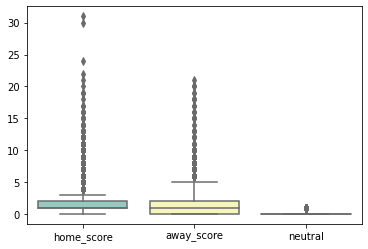

In [222]:
# checking for outliers 
# here we will check for outliers using box plots. only numerical columns are considered i.e using box plots
# this implies that we have plot boxplots for columns except for those with object datatypes
ax = sns.boxplot(data=results, orient="v", palette="Set3")

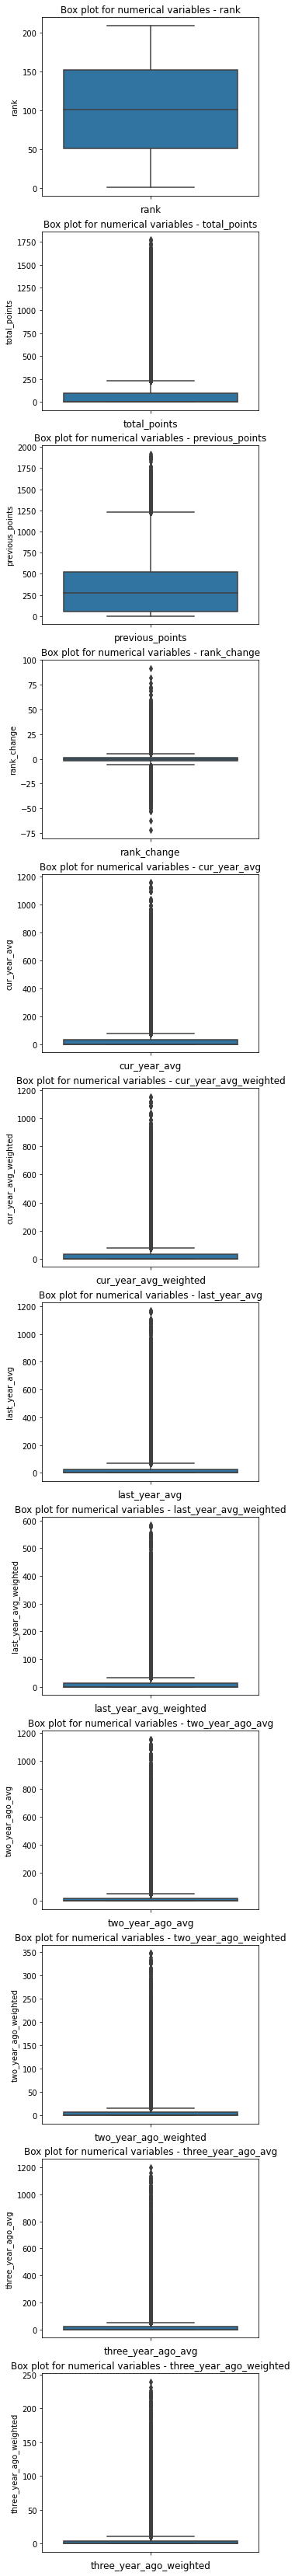

In [223]:
#fifa.boxplot(showmeans=True)
numerical_col_fifa= ['rank', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted']
numerical_col_fifa


fig, ax = plt.subplots(len(numerical_col_fifa), figsize=(5,60))

for i, col_val in enumerate(numerical_col_fifa):

    sns.boxplot(y=fifa[col_val], ax=ax[i])
    ax[i].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

In [224]:
# since fifa rankings were introduced in December 1992 we will consider results and  
# fifa rankings from 1993. 
# first we converting data types for date to datetime to make it easy to work with years
fifa.rank_date = pd.to_datetime(fifa.rank_date)
results.date = pd.to_datetime(results.date)

In [225]:
# year columns
fifa['year'] = fifa.rank_date.dt.year
results['year'] = results.date.dt.year

# month columns
fifa['month'] = fifa.rank_date.dt.month
results['month'] = results.date.dt.month

In [226]:
# the fifa table has rankings from 1993
# result tables has data from the 19th century. we consider only records from 1993 from the results
# table too.
# we rename the new dataframe as results1 
results1 = results[results['year'] >= 1993]
results1.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
17361,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,1
17362,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Libreville,Gabon,False,1993,1


In [227]:
results1.shape

(23478, 11)

Now dealing with columns, 


In [228]:
# dropping all the unncesary columns from the 2 dataframes 
#fifa.columns
fifa1 =fifa.drop(columns=['country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted'])
fifa1.head(2)


,rank,country_full,confederation,rank_date,year,month
0,1,Germany,UEFA,1993-08-08,1993,8
1,2,Italy,UEFA,1993-08-08,1993,8


In [229]:
# results1.columns
results2 =results1.drop(columns=['city', 'country'])

results.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3


* City and country where the tournament was played are not important to make predictions

In [230]:
# Merging the data sets

# NB: both away and home teams had diffrent ranks over the years, so we should merge the two 
# datasets based on the
# away and home ranks, and then merge them to one dataframe # gosh anisa,stop overthinking
# team names in the results table are the same as the country name in the fifa tables. 
# home team/away team(country), year and month should be the same in both tables, so we merge on this columns 

away = pd.merge(results2, fifa1, left_on = ['away_team','year', 'month'], 
                right_on = ['country_full','year', 'month'])

# renaming the rank column from rank to away_rank
away  = away.rename(columns={'rank': 'away_rank'})
away.head(2)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,away_rank,country_full,confederation,rank_date
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08
1,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08


In [231]:
home = pd.merge(results2, fifa1,  left_on = ['home_team', 'year', 'month'], 
                right_on = ['country_full', 'year', 'month'] )
# renaming the rank to home_rank 
home = home.rename(columns={'rank': 'home_rank'})
home.head(2)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_rank,country_full,confederation,rank_date
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,19,Colombia,CONMEBOL,1993-08-08
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,False,1993,8,19,Colombia,CONMEBOL,1993-08-08


In [232]:
# combining the two dataframes away and home, 

#final_fifa =home.append(away, ignore_index=True) # gave us null values.
final_fifa = pd.merge(away,home, how= 'inner', left_on = ['year', 'month', 'away_team'], 
                      right_on = ['year', 'month', 'away_team']) 

final_fifa.head(5)

,date_x,home_team_x,away_team,home_score_x,away_score_x,tournament_x,neutral_x,year,month,away_rank,country_full_x,confederation_x,rank_date_x,date_y,home_team_y,home_score_y,away_score_y,tournament_y,neutral_y,home_rank,country_full_y,confederation_y,rank_date_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,1993-08-01,Colombia,0,0,FIFA World Cup qualification,False,19,Colombia,CONMEBOL,1993-08-08
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,1993-08-29,Argentina,0,0,FIFA World Cup qualification,False,5,Argentina,CONMEBOL,1993-08-08
2,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,1993-08-01,Colombia,0,0,FIFA World Cup qualification,False,19,Colombia,CONMEBOL,1993-08-08
3,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,1993-08-29,Argentina,0,0,FIFA World Cup qualification,False,5,Argentina,CONMEBOL,1993-08-08
4,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993,8,5,Argentina,CONMEBOL,1993-08-08,1993-08-15,Colombia,2,1,FIFA World Cup qualification,False,19,Colombia,CONMEBOL,1993-08-08


* From above, it is clear to see that there are duplicates. each record seems to have been duplicated

In [233]:
#final_fifa.drop_duplicates(keep = 'first', inplace = True)
#final_fifa.head(10)
final_fifa1 = final_fifa.drop_duplicates(keep=False)
final_fifa1

,date_x,home_team_x,away_team,home_score_x,away_score_x,tournament_x,neutral_x,year,month,away_rank,country_full_x,confederation_x,rank_date_x,date_y,home_team_y,home_score_y,away_score_y,tournament_y,neutral_y,home_rank,country_full_y,confederation_y,rank_date_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,1993-08-01,Colombia,0,0,FIFA World Cup qualification,False,19,Colombia,CONMEBOL,1993-08-08
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,1993-08-29,Argentina,0,0,FIFA World Cup qualification,False,5,Argentina,CONMEBOL,1993-08-08
2,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,1993-08-01,Colombia,0,0,FIFA World Cup qualification,False,19,Colombia,CONMEBOL,1993-08-08
3,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,1993-08-29,Argentina,0,0,FIFA World Cup qualification,False,5,Argentina,CONMEBOL,1993-08-08
4,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993,8,5,Argentina,CONMEBOL,1993-08-08,1993-08-15,Colombia,2,1,FIFA World Cup qualification,False,19,Colombia,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28434,2018-06-26,Nigeria,Argentina,1,2,FIFA World Cup,True,2018,6,5,Argentina,CONMEBOL,2018-06-07,2018-06-26,Nigeria,1,2,FIFA World Cup,True,48,Nigeria,CAF,2018-06-07
28435,2018-06-30,France,Argentina,4,3,FIFA World Cup,True,2018,6,5,Argentina,CONMEBOL,2018-06-07,2018-06-30,France,4,3,FIFA World Cup,True,7,France,UEFA,2018-06-07
28436,2018-06-30,France,Argentina,4,3,FIFA World Cup,True,2018,6,5,Argentina,CONMEBOL,2018-06-07,2018-06-26,Nigeria,1,2,FIFA World Cup,True,48,Nigeria,CAF,2018-06-07
28437,2018-06-28,Japan,Poland,0,1,FIFA World Cup,True,2018,6,8,Poland,UEFA,2018-06-07,2018-06-28,Japan,0,1,FIFA World Cup,True,61,Japan,AFC,2018-06-07


In [234]:
# dropping redundant columns
final_fifa1.columns
final_fifa2 =final_fifa1.drop(columns=['date_y','home_team_y', 'home_score_y', 'away_score_y', 'tournament_y',
                         'neutral_y', 'country_full_y', 'confederation_y','rank_date_y'])
final_fifa2.head(2)


,date_x,home_team_x,away_team,home_score_x,away_score_x,tournament_x,neutral_x,year,month,away_rank,country_full_x,confederation_x,rank_date_x,home_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,19
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,5


In [235]:
# renaming columns 
#home = home.rename(columns={'rank': 'home_rank'})
final_fifa3 = final_fifa2.rename(columns={'date_x': 'date','home_team_x':'home_team', 'home_score_x': 'home_score', 'away_score_x': 'away_score', 'tournament_x': 'tournament',
                         'neutral_x': 'neutral', 'country_full_x': 'country_full', 'confederation_x': 'confederation','rank_date_x': 'rank_date'})
final_fifa3.head(2)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,away_rank,country_full,confederation,rank_date,home_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,19
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,5


In [236]:
# now adding a column for total goals scored



final_fifa3['Total_goals'] = final_fifa3.home_score + final_fifa3.away_score
final_fifa3.head(3)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,away_rank,country_full,confederation,rank_date,home_rank,Total_goals
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,19,0
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,5,0
2,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,19,0


* Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

In [237]:
# now, we create a result deviation column , 
# negative deviation should imply a loss for the home team, positive deviation should 
# imply a win, any other should imply a loss
final_fifa3['Results_deviation'] = final_fifa3['home_score'] - final_fifa3['away_score']
final_fifa3.tail(3)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,away_rank,country_full,confederation,rank_date,home_rank,Total_goals,Results_deviation
28436,2018-06-30,France,Argentina,4,3,FIFA World Cup,True,2018,6,5,Argentina,CONMEBOL,2018-06-07,48,7,1
28437,2018-06-28,Japan,Poland,0,1,FIFA World Cup,True,2018,6,8,Poland,UEFA,2018-06-07,61,1,-1
28438,2018-06-28,England,Belgium,0,1,FIFA World Cup,True,2018,6,3,Belgium,UEFA,2018-06-07,12,1,-1


In [238]:
# Tournament type (World cup, Friendly, Other)
def tournament(i):
  if i == 'FIFA World Cup':
    return 'FIFA World Cup'
  if i == 'Friendly':
    return 'Friendly'
  else:
    return 'Other'

final_fifa3['tournament'] = final_fifa3.tournament.apply(lambda x: tournament(x))
final_fifa3

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,away_rank,country_full,confederation,rank_date,home_rank,Total_goals,Results_deviation
0,1993-08-01,Colombia,Paraguay,0,0,Other,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,19,0,0
1,1993-08-01,Colombia,Paraguay,0,0,Other,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,5,0,0
2,1993-08-29,Argentina,Paraguay,0,0,Other,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,19,0,0
3,1993-08-29,Argentina,Paraguay,0,0,Other,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,5,0,0
4,1993-08-01,Peru,Argentina,0,1,Other,False,1993,8,5,Argentina,CONMEBOL,1993-08-08,19,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28434,2018-06-26,Nigeria,Argentina,1,2,FIFA World Cup,True,2018,6,5,Argentina,CONMEBOL,2018-06-07,48,3,-1
28435,2018-06-30,France,Argentina,4,3,FIFA World Cup,True,2018,6,5,Argentina,CONMEBOL,2018-06-07,7,7,1
28436,2018-06-30,France,Argentina,4,3,FIFA World Cup,True,2018,6,5,Argentina,CONMEBOL,2018-06-07,48,7,1
28437,2018-06-28,Japan,Poland,0,1,FIFA World Cup,True,2018,6,8,Poland,UEFA,2018-06-07,61,1,-1


In [239]:
# defining a function that'll be used to create a result column
def result(Results_deviation):
  if Results_deviation > 0:
    return 'Win'
  elif Results_deviation < 0:
    return 'Loss'
  else:
    return 'Draw'

  result(Results_deviation)

In [240]:
### Use .apply to save the new column 
#df['new_col_name'] = rectangles_df.apply(calculate_area, axis=1) # 
#
final_fifa3['Result'] = final_fifa3.Results_deviation.apply(lambda x: result(x))
final_fifa3.head(2)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,away_rank,country_full,confederation,rank_date,home_rank,Total_goals,Results_deviation,Result
0,1993-08-01,Colombia,Paraguay,0,0,Other,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,19,0,0,Draw
1,1993-08-01,Colombia,Paraguay,0,0,Other,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,5,0,0,Draw


# 5.EDA
### Univariate analysis 

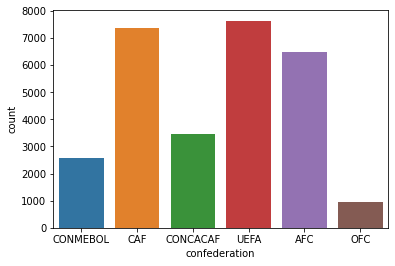

In [241]:
# Bar charts
sns.countplot(final_fifa3['confederation'])

* There are more teams from both the UEFA, CAF  and AFC confederations

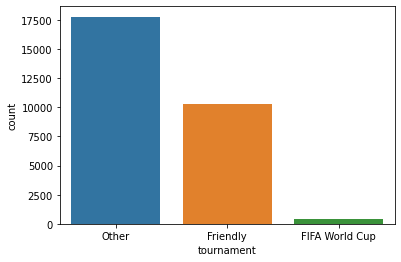

In [242]:
sns.countplot(final_fifa3['tournament'])

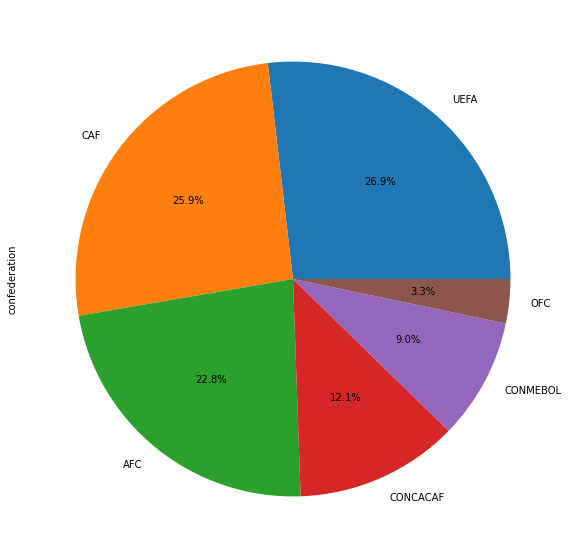

In [243]:
# pie charts 
final_fifa3['confederation'].value_counts().plot(kind='pie', figsize=(18, 10), autopct='%1.1f%%')

* Most of the teams are from UEFA, CAF and AFC confederations.

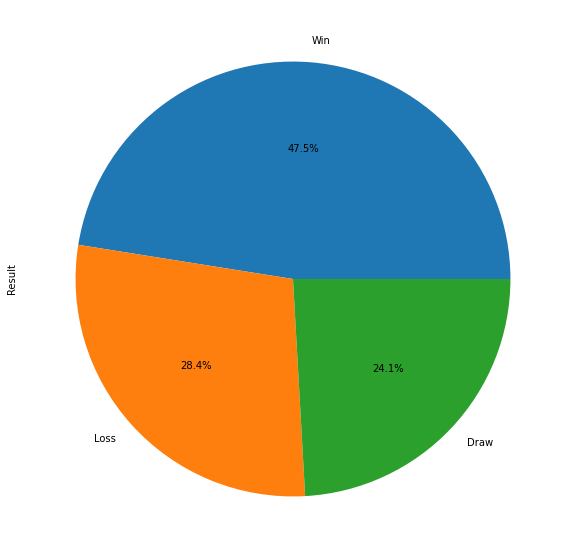

In [244]:
# pie chart for the wins Loses and draws. 
final_fifa3['Result'].value_counts().plot(kind='pie', figsize=(18, 10), autopct='%1.1f%%')

* There have been more wins than losses  and draws from 1993-2019

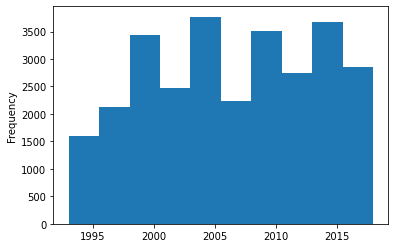

In [245]:
# hist 
final_fifa3['year'].plot.hist(stacked = True)


* The hist shows a trend in the data  i.e  around after every four years there's an increase in the number of matches played. 

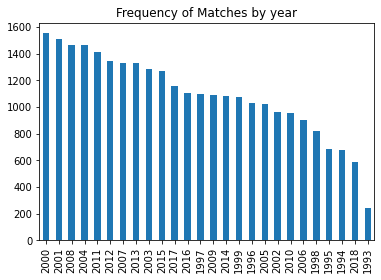

In [246]:
#freq bar plots
final_fifa3['year'].value_counts().plot.bar(title='Frequency of Matches by year') 

- The bar plot shows that there has been a steady increase in the number of matches played each year from 1993. 

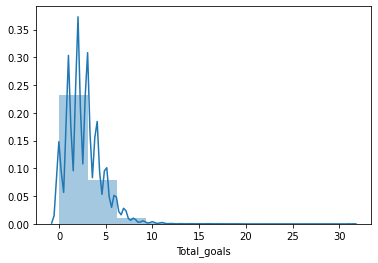

In [247]:
# Ditribution plot for total number of goals 
sns.distplot(final_fifa3['Total_goals'], bins=10)



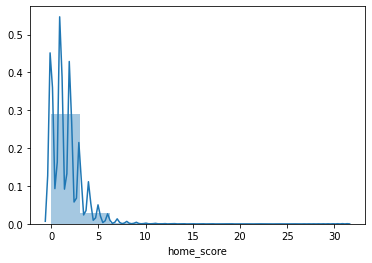

In [248]:
# Ditribution plot for home goals
sns.distplot(final_fifa3['home_score'], bins=10)

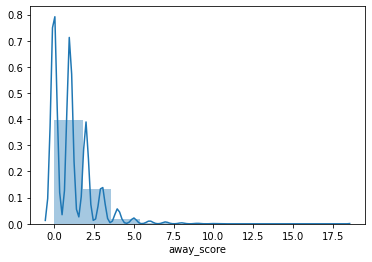

In [249]:
# Ditribution plot for away goals
sns.distplot(final_fifa3['away_score'], bins=10)

Bivarate Analysis

In [250]:
# correlation using the correlation matrix
corrMatrix = final_fifa3.corr()
corrMatrix

,home_score,away_score,neutral,year,month,away_rank,home_rank,Total_goals,Results_deviation
home_score,1.000000,-0.162379,-0.051984,-0.050711,0.017990,0.303473,-0.039610,0.740425,0.819637
away_score,-0.162379,1.000000,0.133285,-0.014252,0.019310,-0.139475,0.136606,0.542989,-0.698372
neutral,-0.051984,0.133285,1.000000,0.037381,-0.084468,0.043419,0.014502,0.046551,-0.115091
year,-0.050711,-0.014252,0.037381,1.000000,-0.008268,0.091281,0.091889,-0.052865,-0.028509
month,0.017990,0.019310,-0.084468,-0.008268,1.000000,0.068120,0.067434,0.028463,0.001838
away_rank,0.303473,-0.139475,0.043419,0.091281,0.068120,1.000000,0.515308,0.163259,0.301105
home_rank,-0.039610,0.136606,0.014502,0.091889,0.067434,0.515308,1.000000,0.059344,-0.108043
Total_goals,0.740425,0.542989,0.046551,-0.052865,0.028463,0.163259,0.059344,1.000000,0.221823
Results_deviation,0.819637,-0.698372,-0.115091,-0.028509,0.001838,0.301105,-0.108043,0.221823,1.000000


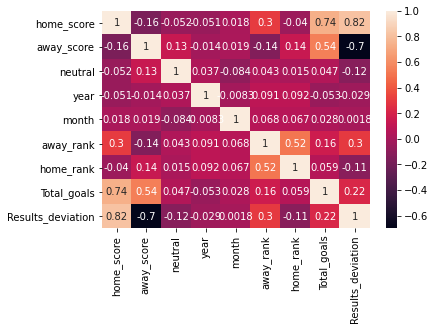

In [251]:
# correlation using heat map
corelation = final_fifa3.corr()
# using a heatmap to display the results
sns.heatmap(corelation,xticklabels = corelation.columns, yticklabels = corelation.columns, annot=True)


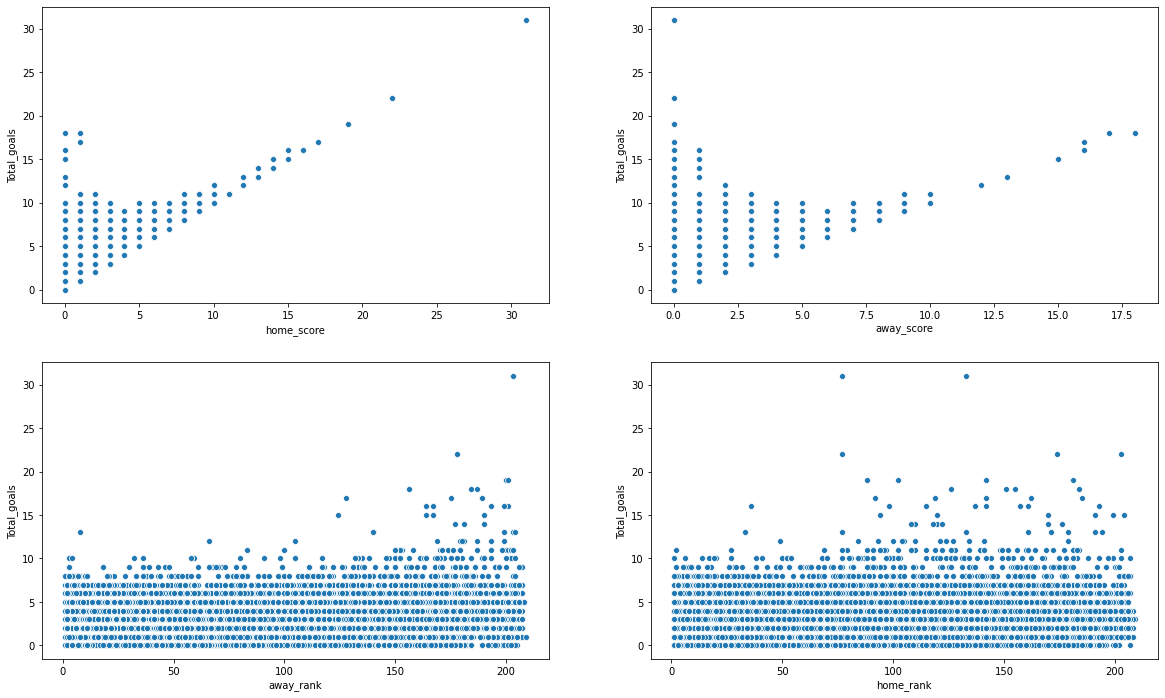

In [252]:

# Scatterplots

# Plotting scatter plots to show how goals were

columns1 =['home_score', 'away_score', 'away_rank', 'home_rank']


fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 12))

for ax, data, column in zip(axes.flatten(), final_fifa3, columns1):
  sns.scatterplot(final_fifa3[column], final_fifa3.Total_goals, ax = ax)

# sns.scatterplot(final_fifa3[column], final_fifa3.home_score, ax = ax) #not conclusive scatters with this line




In [253]:
# Check of multicollinearity
# Start building the model
# Cross-validate the model
# Compute RMSE
# Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test

# 6.Implementing the solution

## Approach 1: Polynomial approach

In [254]:
# Check of multicollinearity
# here, we focus only on the independent variables. Therefore we create a df for 
# the independent varibales needed 

fifa_mult = final_fifa3[['home_team',	'away_team',	'home_score',	'away_score',	'tournament', 'home_rank', 'away_rank']]
fifa_mult.head()

,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank
0,Colombia,Paraguay,0,0,Other,19,67
1,Colombia,Paraguay,0,0,Other,5,67
2,Argentina,Paraguay,0,0,Other,19,67
3,Argentina,Paraguay,0,0,Other,5,67
4,Peru,Argentina,0,1,Other,19,5


In [255]:
# Let's display the correlations between the variables
correlations = fifa_mult.corr()

correlations

,home_score,away_score,home_rank,away_rank
home_score,1.000000,-0.162379,-0.039610,0.303473
away_score,-0.162379,1.000000,0.136606,-0.139475
home_rank,-0.039610,0.136606,1.000000,0.515308
away_rank,0.303473,-0.139475,0.515308,1.000000


* The table above shows that each variable correlates with the other. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Let's use these correlations to compute the VIF score for each variable.

In [256]:
# VIF 
# we create a new dataframe with the inverse of the matrix above.
VIF = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
VIF

,home_score,away_score,home_rank,away_rank
home_score,1.174952,0.082149,0.290221,-0.494662
away_score,0.082149,1.091084,-0.287786,0.275547
home_rank,0.290221,-0.287786,1.520683,-0.911832
away_rank,-0.494662,0.275547,-0.911832,1.658423


 * All of this scores are under 5, therefore there is no multicollinearity

In [191]:
# Start building the model
# Predict how many goals the home team scores. Therefore home_score is the dependent variable
# Compute RMSE
a = fifa_mult.iloc[[0, 1, 3, 4, 5, 6]] # data must be one-dimensional for it to work 
Y = fifa_mult.home_score
print(x)
print(y)

       home_team  away_team  away_score      tournament  home_rank  away_rank
0       Colombia   Paraguay           0           Other         19         67
1       Colombia   Paraguay           0           Other          5         67
2      Argentina   Paraguay           0           Other         19         67
3      Argentina   Paraguay           0           Other          5         67
4           Peru  Argentina           1           Other         19          5
...          ...        ...         ...             ...        ...        ...
28434    Nigeria  Argentina           2  FIFA World Cup         48          5
28435     France  Argentina           3  FIFA World Cup          7          5
28436     France  Argentina           3  FIFA World Cup         48          5
28437      Japan     Poland           1  FIFA World Cup         61          8
28438    England    Belgium           1  FIFA World Cup         12          3

[28439 rows x 6 columns]
0        0
1        0
2        0
3    

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import sklearn as sk
from sklearn import preprocessing 
from sklearn.preprocessing import OrdinalEncoder
e = sk.preprocessing.LabelEncoder
le = preprocessing.LabelEncoder()
# assigning the transformed dataframe to 'a'
X = a.apply(e().fit_transform)
X
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)


# Fitting the polynomial features to the X_train and X_test
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model
print('RMSE score is :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE score is : 1.4546304996250412


* The lower the RMSE the better the model. The model has an RMSE of 1.45 which is fairly okay and can be used for predicting the home score. 